In [97]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv("mobilenetv2.csv")
df

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,adagrad,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,adam,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,adamax,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,ftrl,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,nadam,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312
...,...,...,...,...,...,...,...,...,...
2116,sgd,57.225,59.225,40.4846,2,261.0018,13,0.11233,0.95312
2117,rmsprop,55.925,40.575,31.8268,2,130.5009,16,0.07947,0.95833
2118,adadelta,51.250,62.075,35.4096,2,391.5027,11,0.62000,0.64062
2119,adagrad,53.950,54.275,36.0557,2,304.5021,12,0.33067,0.77083


In [3]:
df.optimizer.value_counts()

adagrad     266
adam        266
adamax      265
ftrl        265
nadam       265
sgd         265
rmsprop     265
adadelta    264
Name: optimizer, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   optimizer    2121 non-null   object 
 1   cpu          2121 non-null   float64
 2   memory       2121 non-null   float64
 3   time         2121 non-null   float64
 4   epochs       2121 non-null   int64  
 5   predictions  2121 non-null   float64
 6   dataset      2121 non-null   int64  
 7   loss         2121 non-null   float64
 8   accuracy     2121 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 149.3+ KB


In [5]:
df.isnull().sum()

optimizer      0
cpu            0
memory         0
time           0
epochs         0
predictions    0
dataset        0
loss           0
accuracy       0
dtype: int64

In [6]:
df.describe()

,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
count,2121.000000,2121.000000,2121.000000,2121.0,2121.000000,2121.000000,2121.000000,2121.000000
mean,56.210514,52.265017,34.702572,2.0,240.615531,14.444602,0.235093,0.884187
std,6.696207,15.688804,5.030588,0.0,123.190293,2.728064,0.237126,0.158287
min,30.725000,16.675000,23.651400,2.0,43.500300,1.000000,0.004010,0.223960
25%,52.050000,43.975000,30.839700,2.0,130.500900,15.000000,0.083880,0.885420
50%,57.250000,51.900000,34.866100,2.0,217.501500,15.000000,0.130800,0.947920
75%,61.975000,59.450000,38.040500,2.0,348.002400,16.000000,0.284860,0.973960
max,81.400000,81.575000,56.897100,2.0,435.003100,16.000000,1.235300,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['optimizer'] = le.fit_transform(df['optimizer'])

In [8]:
df.head()

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,1,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,2,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,3,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,4,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,5,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312


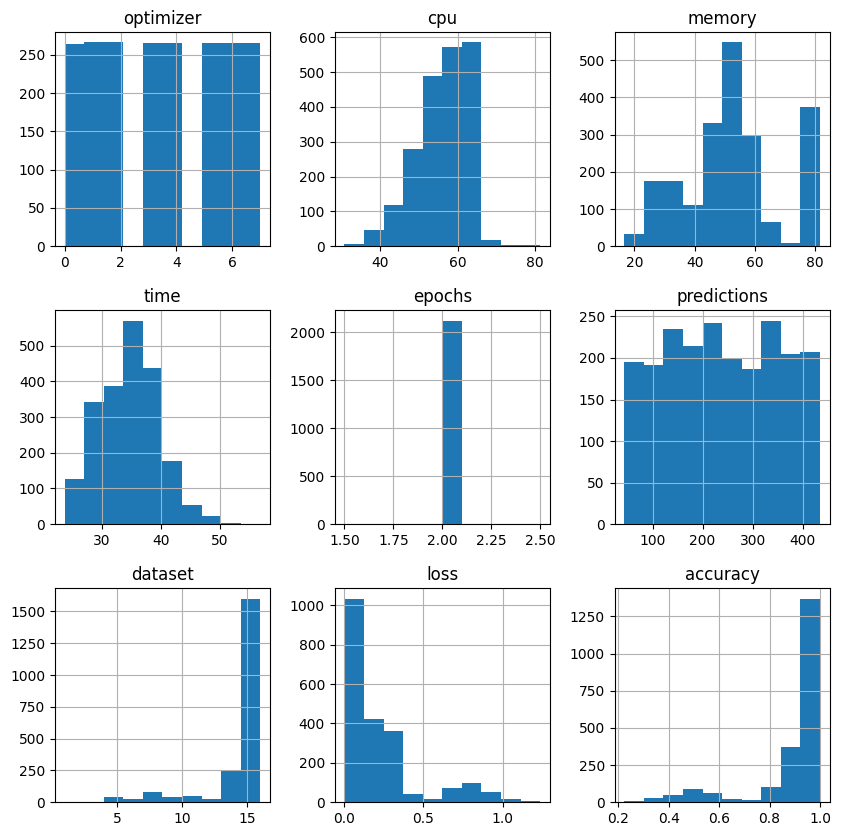

In [9]:
plot = df.hist(figsize=(10,10))

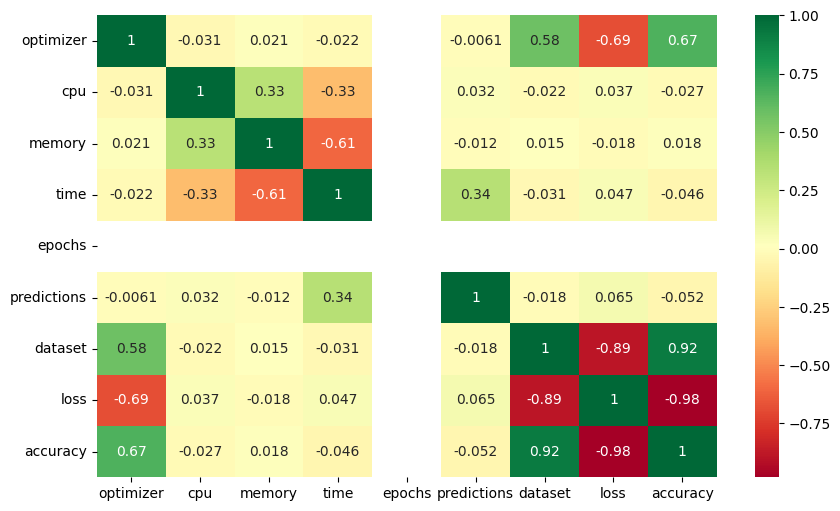

In [40]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn', annot=True)
plt.show()

In [43]:
X = df.drop(columns='optimizer')
y = df['optimizer']

In [44]:
X.head()

,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [76]:
rf = RandomForestClassifier(max_depth=8)

rf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.753
Test set score: 0.531
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.81      0.68      0.74        68
           2       0.38      0.12      0.19        73
           3       0.51      0.71      0.60        51
           4       0.70      0.82      0.76        76
           5       0.23      0.70      0.34        54
           6       0.44      0.16      0.24        68
           7       0.35      0.15      0.22        71

    accuracy                           0.53       531
   macro avg       0.55      0.54      0.51       531
weighted avg       0.56      0.53      0.51       531



In [57]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
6,loss,0.329
7,accuracy,0.214
2,time,0.104
1,memory,0.100
0,cpu,0.094
5,dataset,0.093
4,predictions,0.067
3,epochs,0.000


In [96]:
xg = XGBClassifier(n_estimators=12)

xg.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(xg.score(X_test, y_test)))

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.862
Test set score: 0.540
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.80      0.65      0.72        68
           2       0.29      0.19      0.23        73
           3       0.60      0.78      0.68        51
           4       0.72      0.84      0.78        76
           5       0.20      0.31      0.25        54
           6       0.43      0.26      0.33        68
           7       0.27      0.30      0.28        71

    accuracy                           0.54       531
   macro avg       0.54      0.54      0.53       531
weighted avg       0.55      0.54      0.54       531



In [58]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(xg.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
7,accuracy,0.385
6,loss,0.262
4,predictions,0.094
5,dataset,0.075
2,time,0.064
1,memory,0.062
0,cpu,0.058
3,epochs,0.000


In [51]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.8)

log.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log.score(X_test, y_test)))

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.533
Test set score: 0.503
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        70
           1       0.80      0.72      0.76        68
           2       0.35      0.08      0.13        73
           3       0.57      0.75      0.64        51
           4       0.78      0.88      0.83        76
           5       0.16      0.41      0.23        54
           6       0.21      0.19      0.20        68
           7       0.15      0.07      0.10        71

    accuracy                           0.50       531
   macro avg       0.50      0.51      0.48       531
weighted avg       0.51      0.50      0.49       531



Neural Networks

In [127]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=X.shape[1],activation='relu', input_shape=(X_train.shape[1],)),
    # keras.layers.Dropout(0.3),
    # keras.layers.Dense(16, activation='relu'),
    # keras.layers.Dropout(0.3),
    # keras.layers.Dense(16, activation='relu'),
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [128]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=20, callbacks=[early_stopping], validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/10
80/80 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1281
Epoch 2/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1281
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1281
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1281
Epoch 5/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1245 - val_loss: 0.0000e+00 - val_accuracy: 0.1281
Epoch 6/10
17/17 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1281
Test accuracy: 0.1280602663755417
